In [1]:
# Import packages 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from ipywidgets import interact,widgets
import folium

In [8]:
# Import data
death_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv')
confirmed_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')
recovered_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv')
cases_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/web-data/data/cases_country.csv')

In [9]:
print(death_df.shape)
print(confirmed_df.shape)
print(recovered_df.shape)
print(cases_df.shape)

(273, 383)
(273, 383)
(258, 383)
(192, 14)


In [10]:
cases_df.head(10)

Country_Region          Last_Update       Lat       Long_  Confirmed  \
0          Afghanistan  2021-02-04 09:23:33  33.93911   67.709953    55174.0   
1              Albania  2021-02-04 09:23:33  41.15330   20.168300    80941.0   
2              Algeria  2021-02-04 09:23:33  28.03390    1.659600   108116.0   
3              Andorra  2021-02-04 09:23:33  42.50630    1.521800    10070.0   
4               Angola  2021-02-04 09:23:33 -11.20270   17.873900    19937.0   
5  Antigua and Barbuda  2021-02-04 09:23:33  17.06080  -61.796400      249.0   
6            Argentina  2021-02-04 09:23:33 -38.41610  -63.616700  1952744.0   
7              Armenia  2021-02-04 09:23:33  40.06910   45.038200   167568.0   
8            Australia  2021-02-04 09:23:33 -25.00000  133.000000    28838.0   
9              Austria  2021-02-04 09:23:33  47.51620   14.550100   418283.0   

    Deaths  Recovered    Active  Incident_Rate  People_Tested  \
0   2406.0    47995.0    4773.0     141.732215            NaN   
1   1404.0    48958.0   30579.0    2812.599903            NaN   
2   2900.0    73940.0   31276.0     246.552859            NaN   
3    103.0     9313.0     654.0   13033.068013            NaN   
4    470.0    18335.0    1132.0      60.660979            NaN   
5      7.0      179.0      63.0     254.268442            NaN   
6  48539.0  1745208.0  158997.0    4320.633762            NaN   
7   3107.0   159045.0    5416.0    5654.902718            NaN   
8    909.0    26079.0    1850.0     113.269206            NaN   
9   7902.0   396709.0   13672.0    4644.286285            NaN   

   People_Hospitalized  Mortality_Rate  UID ISO3  
0                  NaN        4.360750    4  AFG  
1                  NaN        1.734597    8  ALB  
2                  NaN        2.682304   12  DZA  
3                  NaN        1.022840   20  AND  
4                  NaN        2.357426   24  AGO  
5                  NaN        2.811245   28  ATG  
6                  NaN        2.485682   32  ARG  
7                  NaN        1.854173   51  ARM  
8                  NaN        3.152091   36  AUS  
9                  NaN        1.889152   40  AUT

In [11]:
country=['China','Germany','Morocco']
cases_df[cases_df['Country_Region'].isin(country)]

Country_Region          Last_Update        Lat       Long_  Confirmed  \
36           China  2021-02-04 09:23:33  30.592800  114.305500   100226.0   
66         Germany  2021-02-04 09:23:33  51.165691   10.451526  2254419.0   
120        Morocco  2021-02-04 09:23:33  31.791700   -7.092600   473047.0   

      Deaths  Recovered    Active  Incident_Rate  People_Tested  \
36    4821.0    93280.0    2125.0       7.135167            NaN   
66   59776.0  2003831.0  190812.0    2690.752984            NaN   
120   8323.0   451780.0   12944.0    1281.603491            NaN   

     People_Hospitalized  Mortality_Rate  UID ISO3  
36                   NaN        4.810129  156  CHN  
66                   NaN        2.651504  276  DEU  
120                  NaN        1.759445  504  MAR

In [13]:
cases_df.columns

Index(['Country_Region', 'Last_Update', 'Lat', 'Long_', 'Confirmed', 'Deaths',
       'Recovered', 'Active', 'Incident_Rate', 'People_Tested',
       'People_Hospitalized', 'Mortality_Rate', 'UID', 'ISO3'],
      dtype='object')

In [15]:
# Display statistics in the world
global_data=cases_df.copy().drop(['Country_Region','Last_Update', 'Lat', 'Long_','Active', 'Incident_Rate', 'People_Tested',
       'People_Hospitalized', 'Mortality_Rate', 'UID', 'ISO3'],axis=1)
global_synthese=pd.DataFrame(global_data.sum()).transpose()
global_synthese

Confirmed     Deaths   Recovered
0  104438604.0  2269947.0  58060212.0

In [17]:
# View the most affected countries
fig=go.FigureWidget(layout=go.Layout())
def highlight_col(x):
  r='background-color:red'
  y='background-color:green'
  g='background-color:blue'
  df1=pd.DataFrame('',index=x.index,columns=x.columns)
  df1.iloc[:,4]=y
  df1.iloc[:,5]=r
  df1.iloc[:,6]=g

  return df1

def show_cases(n):
  n=int(n)
  return cases_df.sort_values('Confirmed',ascending=False).head(n).style.apply(highlight_col,axis=None)

interact(show_cases,n='10')

ipywLayout=widgets.Layout(border='solid 2px green')
ipywLayout.display='none'
widgets.VBox([fig],layout=ipywLayout)


interactive(children=(Text(value='10', description='n'), Output()), _dom_classes=('widget-interact',))

    'data': [], 'layout': {'template': '...'}
}),), layout=Layout(border='solid …

In [18]:
cases_class_df= cases_df.sort_values('Confirmed',ascending=False)
cases_class_df.columns

Index(['Country_Region', 'Last_Update', 'Lat', 'Long_', 'Confirmed', 'Deaths',
       'Recovered', 'Active', 'Incident_Rate', 'People_Tested',
       'People_Hospitalized', 'Mortality_Rate', 'UID', 'ISO3'],
      dtype='object')

In [30]:
cases_class_df.columns
px.bar(
   cases_class_df.head(10),
   x= 'Country_Region',
   y= 'Confirmed',
  title='The Ten countries most affected by coronavirus (confirmed cases)',
  color_discrete_sequence=['pink'],
  height=500,
  width=800
)

In [31]:
cases_class_df.columns
px.bar(
   cases_class_df.head(10),
   x= 'Country_Region',
   y= 'Deaths',
  title='The Ten countries most affected by coronavirus (death cases)',
  color_discrete_sequence=['pink'],
  height=500,
  width=800
)

In [32]:
cases_class_df.columns
px.bar(
   cases_class_df.head(10),
   x= 'Country_Region',
   y= 'Recovered',
  title='The Ten countries most affected by coronavirus (recovered cases)',
  color_discrete_sequence=['pink'],
  height=500,
  width=800
)

In [33]:
# Visualize the situation in Tunisia
conf_mar=confirmed_df[confirmed_df['Country/Region']=='Tunisia']
death_mar=death_df[death_df['Country/Region']=='Tunisia']
recovered_mar=recovered_df[recovered_df['Country/Region']=='Tunisia']

In [34]:
# Prepare data in Tunisia
conf_mar=conf_mar.copy().drop(['Province/State', 'Country/Region', 'Lat', 'Long'],axis=1).sum()
death_mar=death_mar.copy().drop(['Province/State', 'Country/Region', 'Lat', 'Long'],axis=1).sum()
recovered_mar=recovered_mar.copy().drop(['Province/State', 'Country/Region', 'Lat', 'Long'],axis=1).sum()

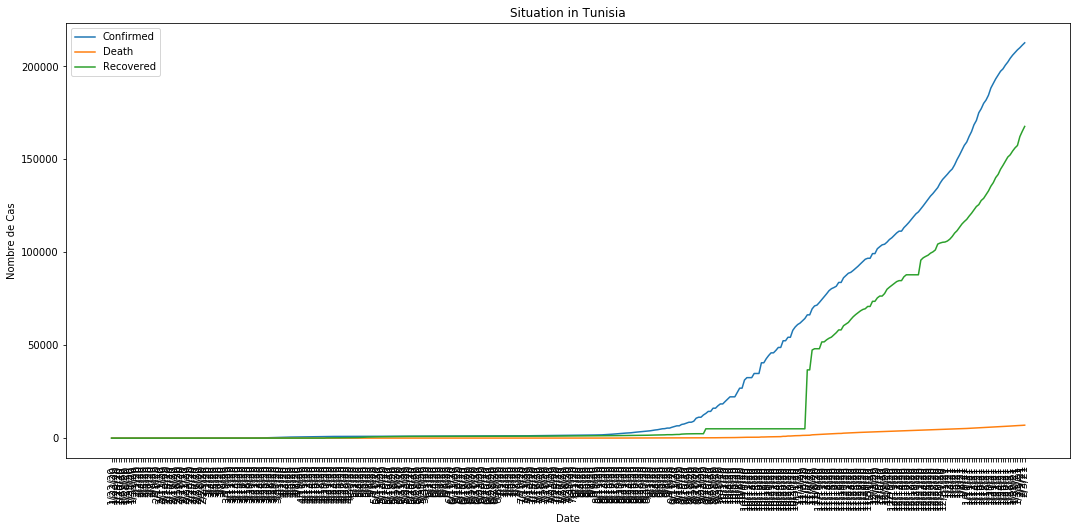

In [35]:
# Plot the graph
fig,ax=plt.subplots(figsize=(18,8))
ax.plot(conf_mar.index,conf_mar.values,label='Confirmed')
ax.plot(death_mar.index,death_mar.values,label='Death')
ax.plot(recovered_mar.index,recovered_mar.values,label='Recovered')

plt.xticks(rotation='vertical')
ax.set(xlabel='Date',ylabel='Nombre de Cas',title='Situation in Tunisia')
plt.legend()